In [166]:
import numpy as np
import matplotlib.pyplot as mlt
from numpy import pi

In [167]:
#defining all the necessary constants here
R        = np.linspace(-10,10,10)
N        = len(R)
h_bar    = 1 #atomic unit
del_x    = R[1] - R[0]
k        = np.pi/del_x
m        = 1 #mass
w        = 1 #omega
com_term = h_bar**2 /(2*m) 

# Solving Time-Independant Shrodinger Equation for Harmonic Oscillator
$\hat{H}|\Psi\rangle = \hat{T} + \hat{V} |\Psi\rangle$

In [168]:
def V(R):
    return 0.5 * m * w**2 * R**2

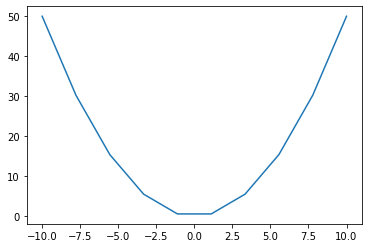

In [169]:
mlt.plot(R,V(R))

In [170]:
cap_V = np.zeros((len(R),len(R)))
for i in range(0,len(R)):
    cap_V[i,i] = V(R)[i]

In [171]:
cap_T = np.zeros((N,N))
for i in range(0,N):
    for j in range(0,N):
        if(i==j):
            cap_T[i,j] = com_term * ((k**2)/3)*(1+(2/(N**2)))
        else:
            cap_T[i,j] = com_term * (2*k**2*(-1)**(j-i))/(N**2 * np.sin(np.pi*(j-i)/N)**2)


In [172]:
cap_H  = cap_T + cap_V
E, psi = np.linalg.eigh(cap_H)

[ 0.74323775  1.15090087  5.86563745  5.93486264 15.75307369 15.79399286
 30.5573967  30.61756851 50.13166319 50.55298136]
[ 0.74323775  1.15090087  5.86563745  5.93486264 15.75307369 15.79399286
 30.5573967  30.61756851 50.13166319 50.55298136]
[ 0.74323775  1.15090087  5.86563745  5.93486264 15.75307369 15.79399286
 30.5573967  30.61756851 50.13166319 50.55298136]
[ 0.74323775  1.15090087  5.86563745  5.93486264 15.75307369 15.79399286
 30.5573967  30.61756851 50.13166319 50.55298136]
[ 0.74323775  1.15090087  5.86563745  5.93486264 15.75307369 15.79399286
 30.5573967  30.61756851 50.13166319 50.55298136]


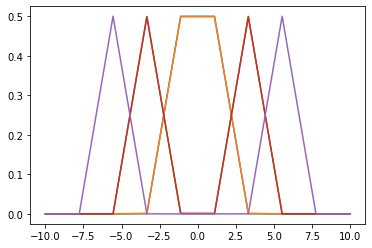

In [173]:
for i in range(0,5):
    mlt.plot(R,(psi[:,i])**2)
    print(E)